# Contents 

## -Data Collection, Cleaning and Preparation ##
## -Data Analysis: Summary Statistics and Descriptive Visualizations ## 
## -Feature Selection and Engineering
## -Modelling
    -Using Logistic Regression
    -Using Random Forests
    -Using Support Vector Machines
## -Insights and Actions



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams

In [2]:
#load churn data from csv
df = pd.read_csv(r"C:\Users\stran\Documents\Data Science Projects\Marketing Analytics\Customer Churn\churn.csv")

# Step 1: Explore data Colomuns through Summary stats

In [3]:
# Get summary of each columns count, mean, std, min, max, and interquartile range
print(df.describe())

       accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count     5000.00000          5000.000000      5000.000000    5000.000000   
mean       100.25860             7.755200       180.288900     100.029400   
std         39.69456            13.546393        53.894699      19.831197   
min          1.00000             0.000000         0.000000       0.000000   
25%         73.00000             0.000000       143.700000      87.000000   
50%        100.00000             0.000000       180.100000     100.000000   
75%        127.00000            17.000000       216.200000     113.000000   
max        243.00000            52.000000       351.500000     165.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean        30.649668       200.636560     100.191000       17.054322   
std          9.162069        50.551309      19.826496        4.296843   
min          0

In [4]:
# Get a sense of the csv table layout using df.head()
df.head(10)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,No,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,No,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,No,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,No,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,No,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


In [5]:
df.mean()

accountlength                 100.258600
numbervmailmessages             7.755200
totaldayminutes               180.288900
totaldaycalls                 100.029400
totaldaycharge                 30.649668
totaleveminutes               200.636560
totalevecalls                 100.191000
totalevecharge                 17.054322
totalnightminutes             200.391620
totalnightcalls                99.919200
totalnightcharge                9.017732
totalintlminutes               10.261780
totalintlcalls                  4.435200
totalintlcharge                 2.771196
numbercustomerservicecalls      1.570400
dtype: float64

# Step 2: Determine the Churn Cases

In [7]:
df['churn'].value_counts()

No     4293
Yes     707
Name: churn, dtype: int64

Results: We see that our data set has experienced 707 people who have churned from our services versus 4,293 who have remained with us.

## Step 3: Determine Differences between Churners and Non-Churners using Data Analysis: 

In [8]:
#View mean of all variables for churners versus non churners
df_mean = df.groupby(['churn']).mean()
df_mean

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
churn,,,,,,,,,,,,,,,
No,99.917074,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722
Yes,102.332390,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597


In [9]:
#View std of all variables for churners versus non churners
df.groupby(['churn']).std()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
churn,,,,,,,,,,,,,,,
No,39.737531,13.809408,49.634575,19.674019,8.437810,50.151854,19.862391,4.262900,50.609570,19.958820,2.277438,2.749994,2.438233,0.742443,1.164236
Yes,39.396993,11.297719,68.576475,20.757110,11.658195,51.568859,19.618258,4.383293,49.685763,19.968555,2.235902,2.793187,2.550011,0.754057,1.815956


Results: Above we see little difference between the means of churners and non-churners in all variables except number of customerservice calls, totalday charge, total minutes and number of mail messages

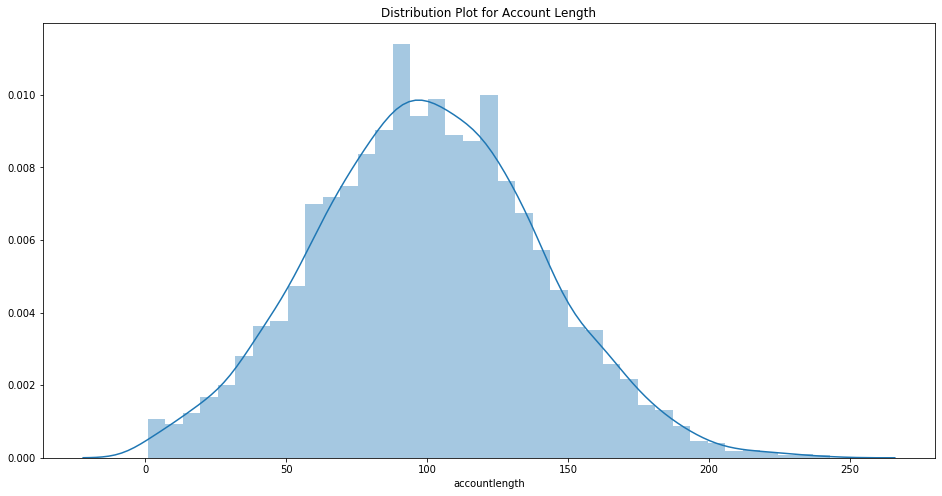

In [12]:
sns.distplot(df['accountlength']).set_title('Distribution Plot for Account Length')
plt.show()
plt.rcParams['figure.figsize'] = (16,8)

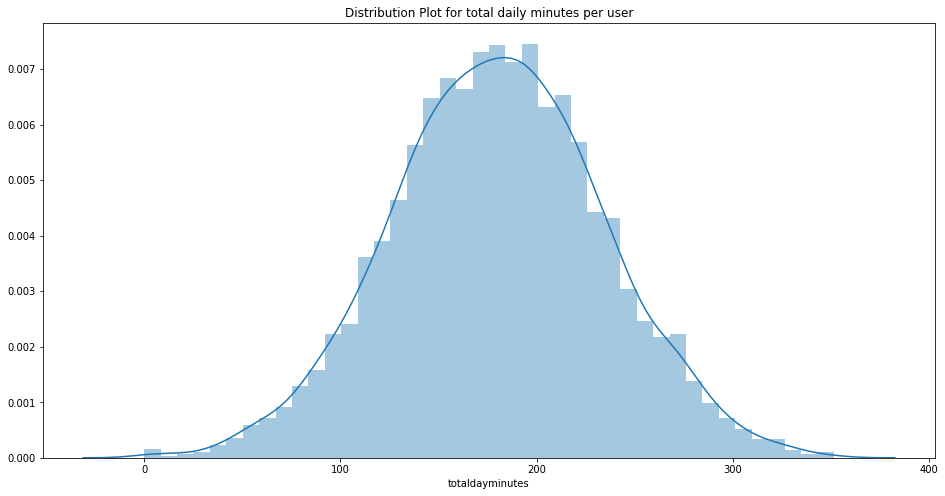

In [42]:
sns.distplot(df['totaldayminutes']).set_title('Distribution Plot for total daily minutes per user')
plt.show()
plt.rcParams['figure.figsize'] = (16,8)

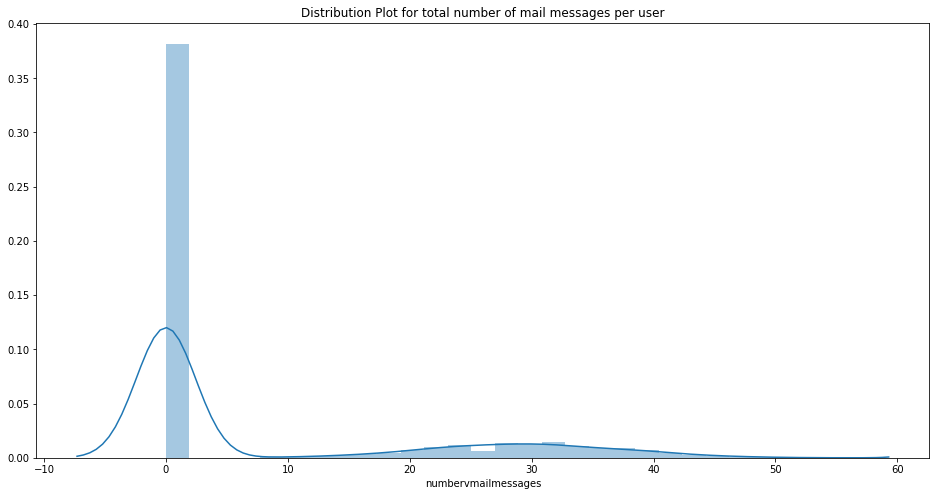

In [45]:
sns.distplot(df['numbervmailmessages']).set_title('Distribution Plot for total number of mail messages per user')
plt.show()
plt.rcParams['figure.figsize'] = (16,8)

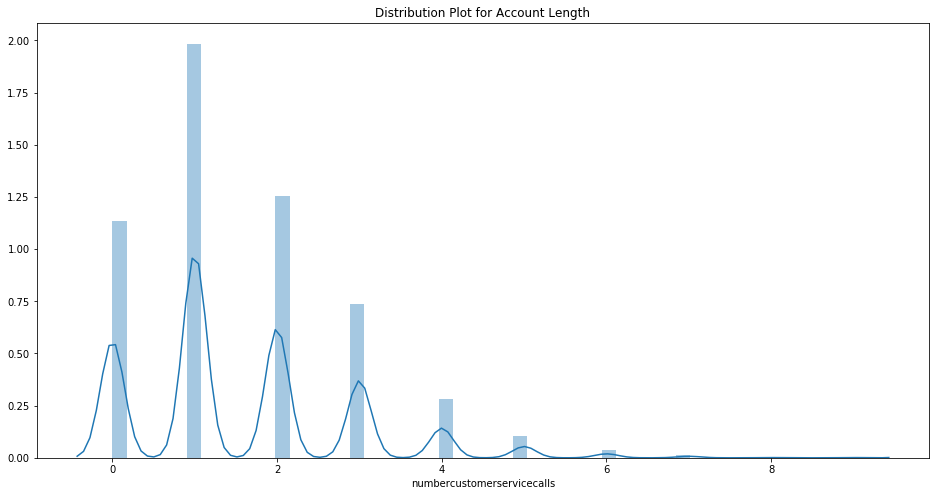

In [49]:
sns.distplot(df['numbercustomerservicecalls']).set_title('Distribution Plot for Account Length')
plt.show()
plt.rcParams['figure.figsize'] = (16,8)

#Results: this distplot of account length shows a very evenly distributed distribution

# Visualize with Boxplots

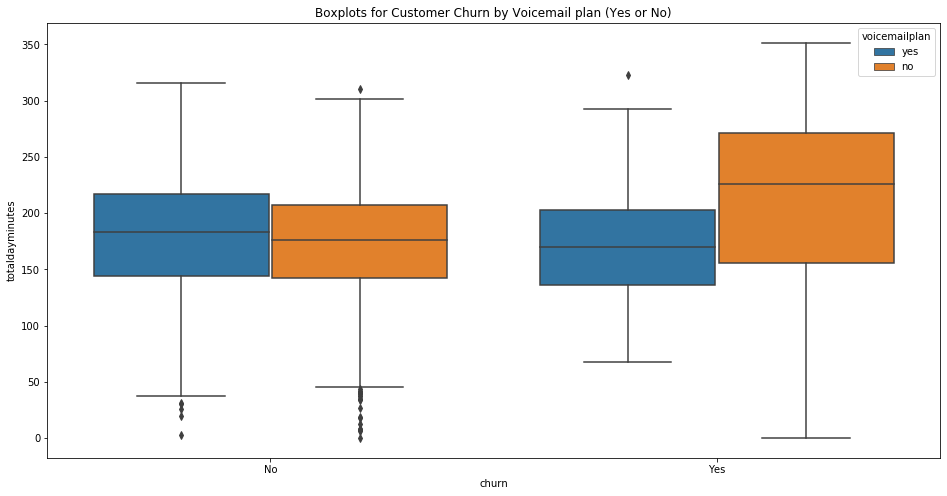

In [13]:
sns.boxplot(x = 'churn',
            y = 'totaldayminutes',
            data = df,
           hue = 'voicemailplan').set_title('Boxplots for Customer Churn by Voicemail plan (Yes or No)')
plt.show()
plt.rcParams['figure.figsize'] = (16,8)

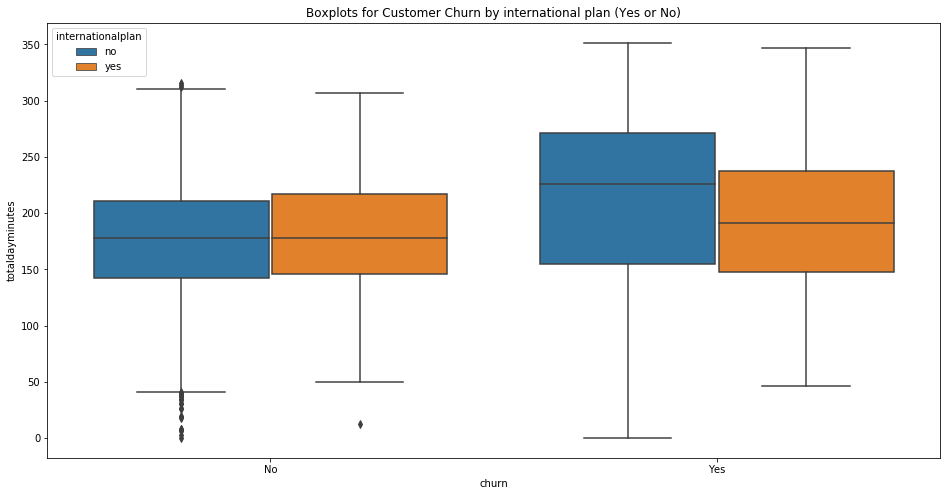

In [14]:
sns.boxplot(x = 'churn',
            y = 'totaldayminutes',
            data = df,
           hue = 'internationalplan').set_title('Boxplots for Customer Churn by international plan (Yes or No)')
plt.show()
plt.rcParams['figure.figsize'] = (16,8)

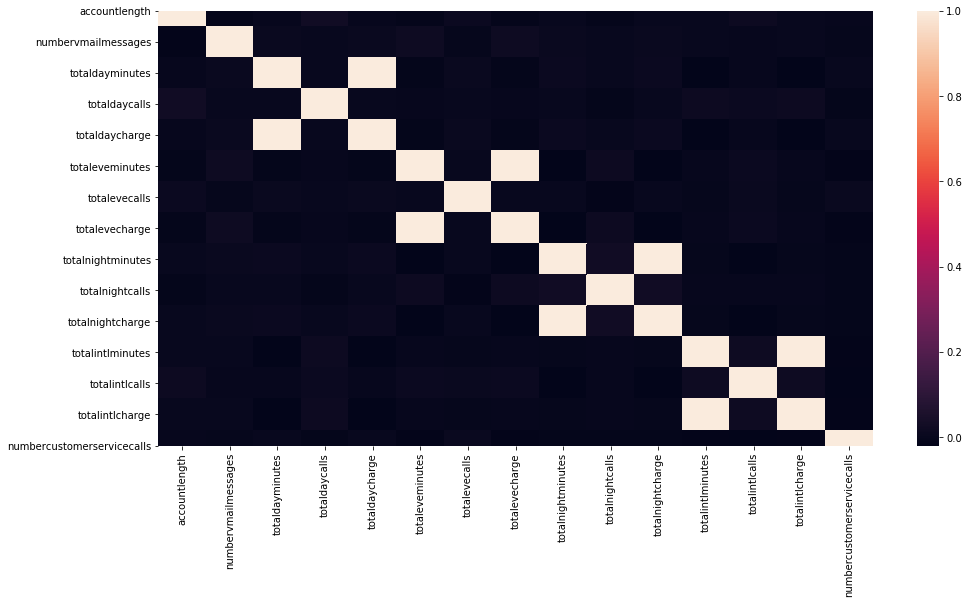

In [15]:
#Correlation matrix heatmap
df_corr = df.corr()
ax = sns.heatmap(df_corr)
plt.rcParams['figure.figsize'] = (25,15)
plt.show()

## Data Preparation and Cleaning

In [16]:
#Convert yes and no responses to numeric
df['churn'] = df['churn'].replace({'No':0 , 'Yes':1})
df['internationalplan'] = df['internationalplan'].replace({'no':0, 'yes':1})
df['voicemailplan'] = df['voicemailplan'].replace({'no':0, 'yes':1})

#df['internationalplan'].head(5)
#df['voicemailplan'].head(5)
df.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


## Feature Scaling

Adjust all variables so that they are normalized to scale.

In [17]:
df.describe()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.141400,100.25860,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,0.348469,39.69456,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,73.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,100.00000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,0.000000,127.00000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,1.000000,243.00000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Create Y Dependent Variable and X Independent Variable and a Train-Test Split Model

In [18]:
# Y(Dependent Variable) is what we are predicting, the churn, and the X(independent variable), are the other variables we are using to test
df['churn'] = df['churn'].astype(int)

Y = df['churn'].values
X = df.drop(labels = ['churn'],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

## Create a Logistic Regression Model Based on the 80% Train Data

In [19]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)


C:\Users\stran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Predict and Validate the model's accuracy of the train set data on the test set data.

In [20]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.861


Results: Logistic Regression predicted the binary Churn classification proble with 86.1% accuracy.

## Predicting Churn using Support Vector Machines

In [50]:
# Using svm from Sk learn
from sklearn.svm import SVC
model = SVC()
result = model.fit(X_train, y_train)

C:\Users\stran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
#using metrics from sklearn to use .predict() function
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.859


# Predicting Churn using Random Forests

In [60]:
# Using svm from Sk learn
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
result = model.fit(X_train, y_train)

In [61]:
#using metrics from sklearn to use .predict() function
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))
print(prediction_test)

0.92
[1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0

## Results: Our results indicate that for this data set random forest produced the best results, predicting with 91.9% accuracy, while Logistic Regression and SVM saw 86.1 and 85.9% respectively. 

-it's important to note that no standardization was used here to normalize the variables and very little feature selection and engineering was needed as there were few categorical variables such as social security, state, tax id etc.

Text(0.5, 1.0, 'Boxplot When Failure = 0')

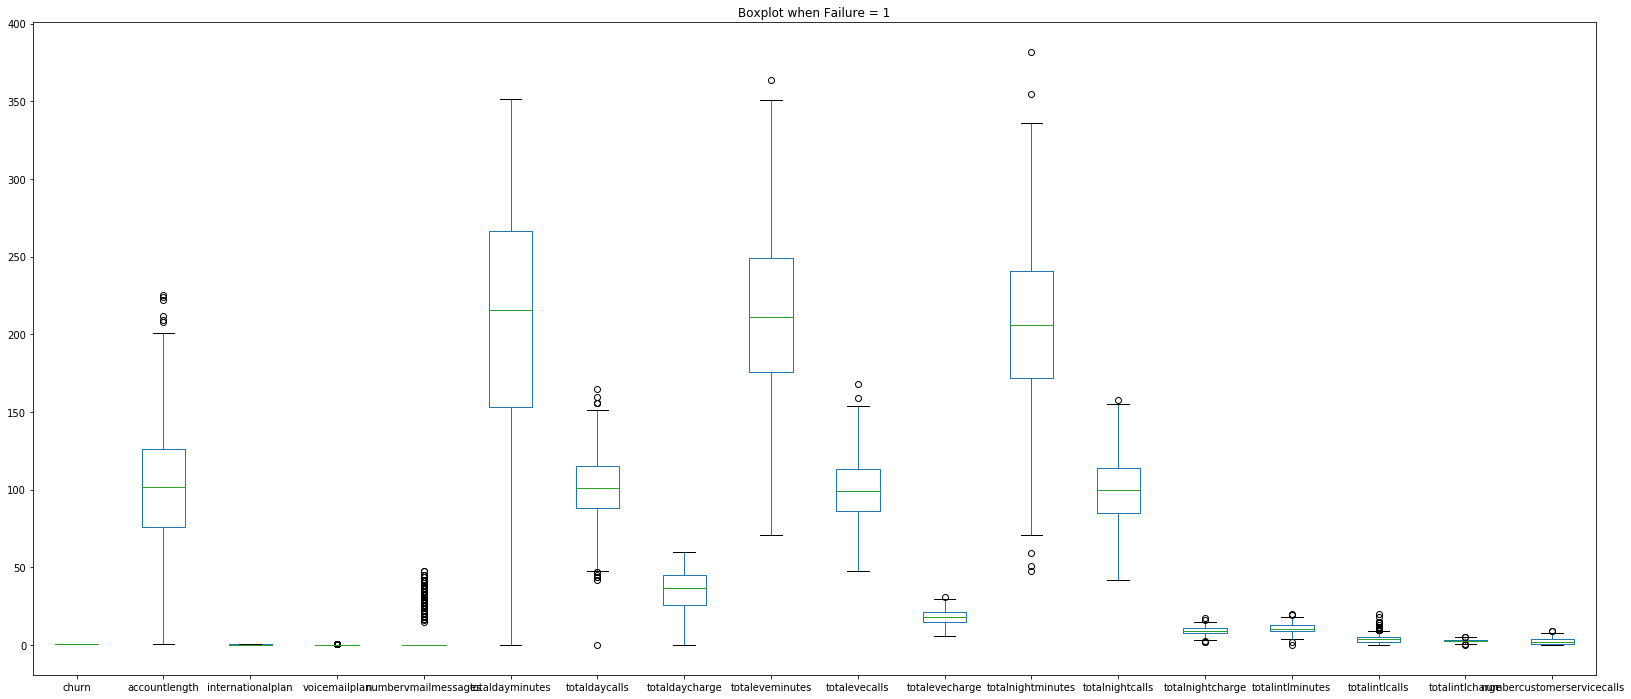

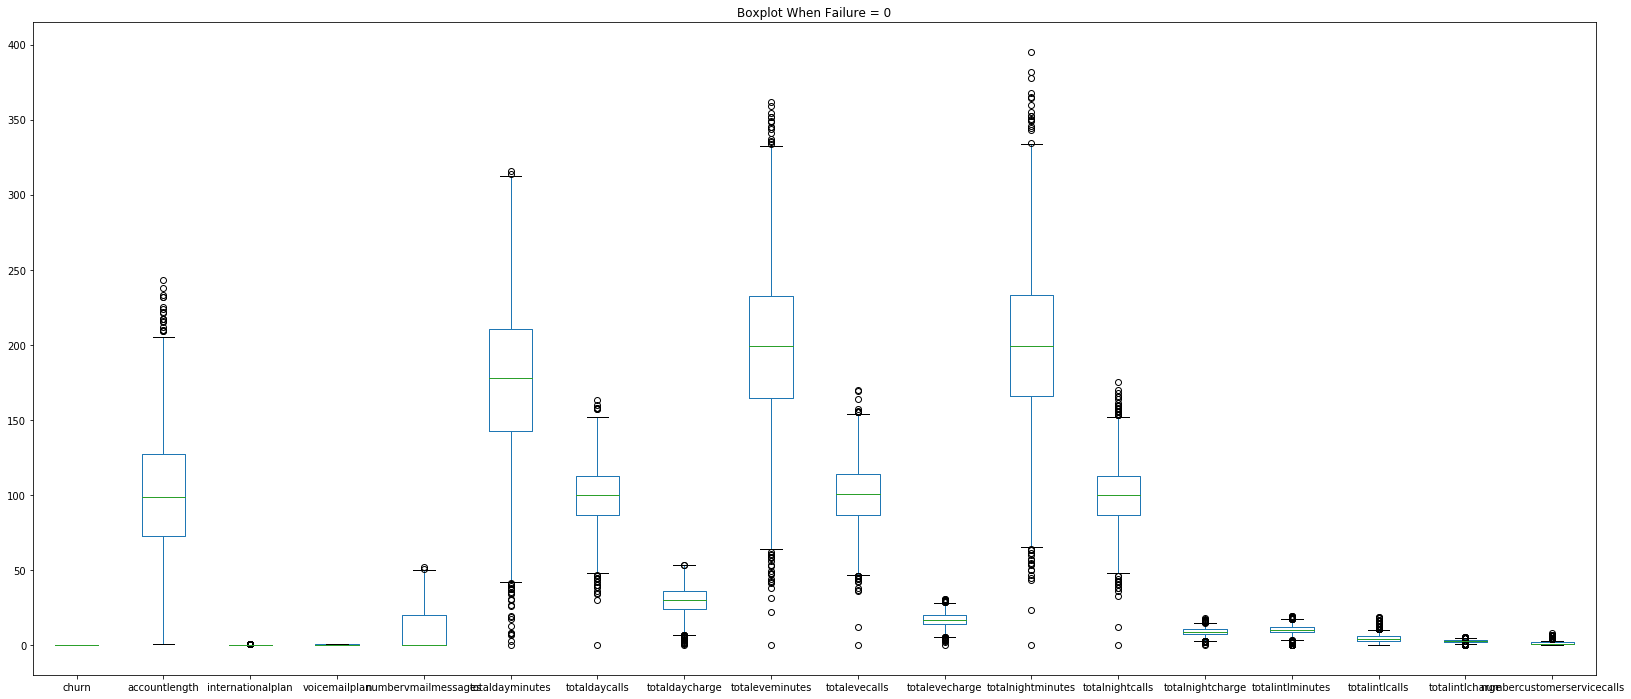

In [54]:
churn = df[df['churn'] == 1]
nonchurn = df[df['churn'] == 0]

churn.plot.box(churn, figsize=(28,12), sharey=True).set_title('Boxplot when Failure = 1')
nonchurn.plot.box(nonchurn, figsize=(28,12), sharey=True).set_title('Boxplot When Failure = 0')

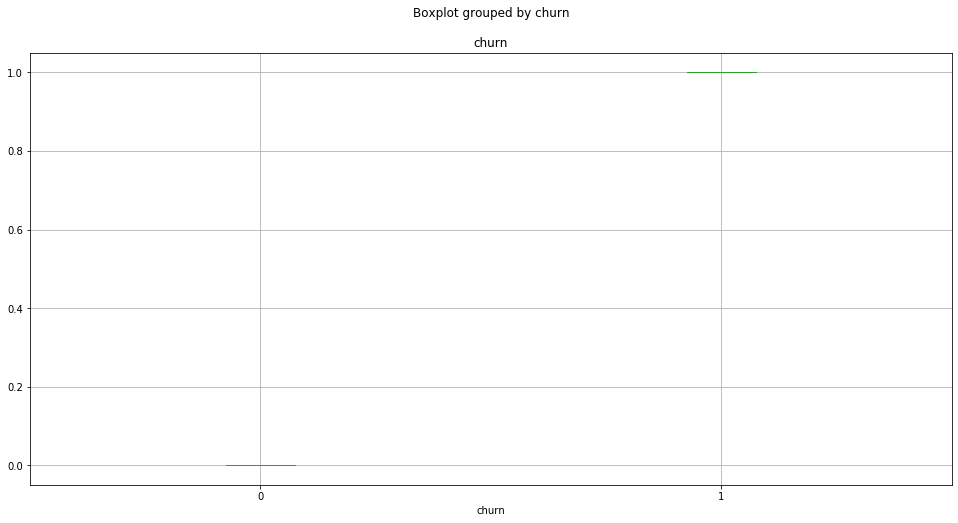

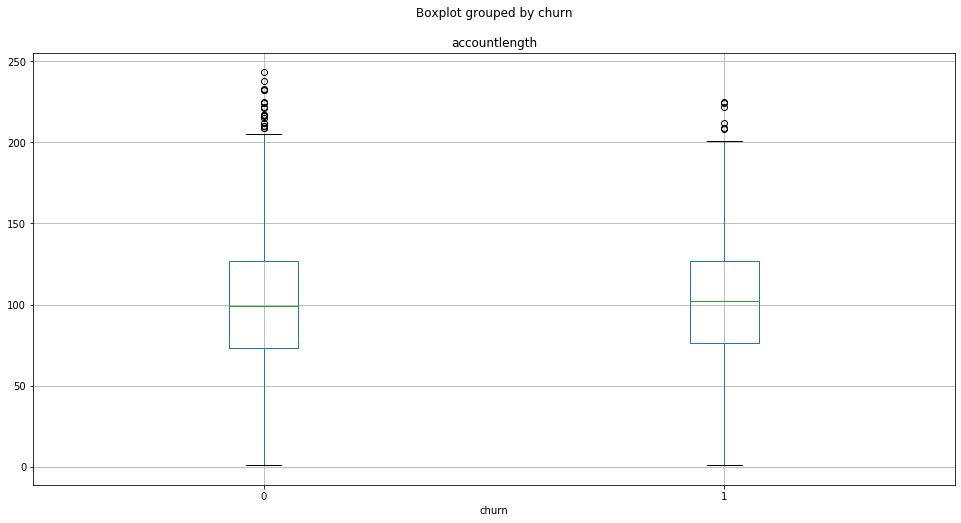

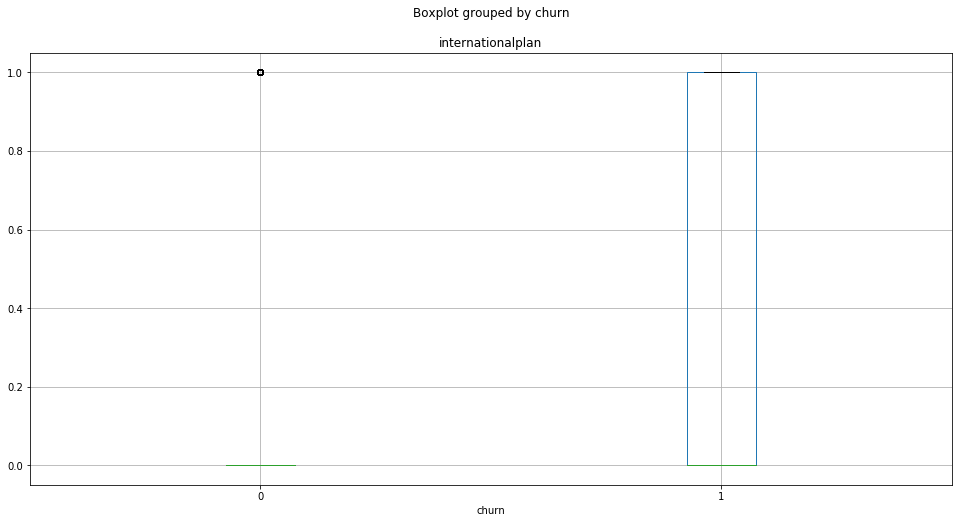

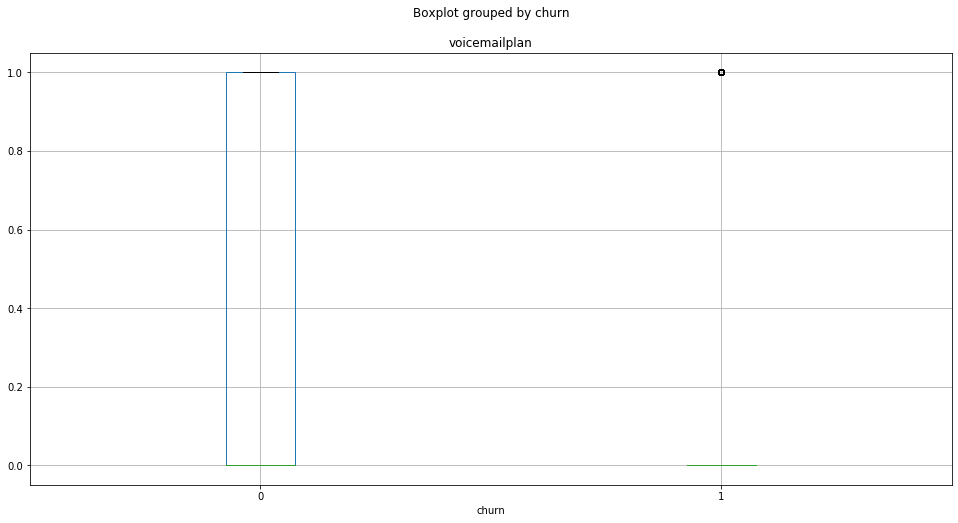

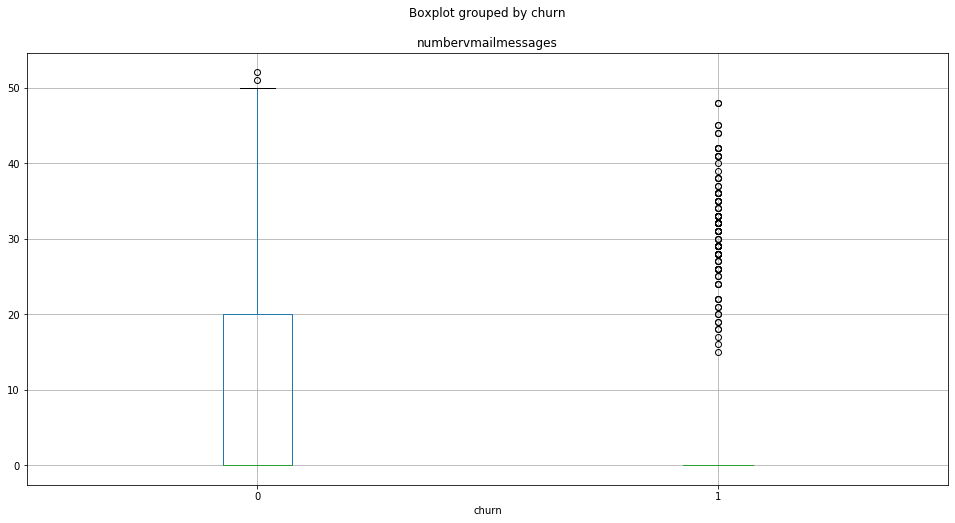

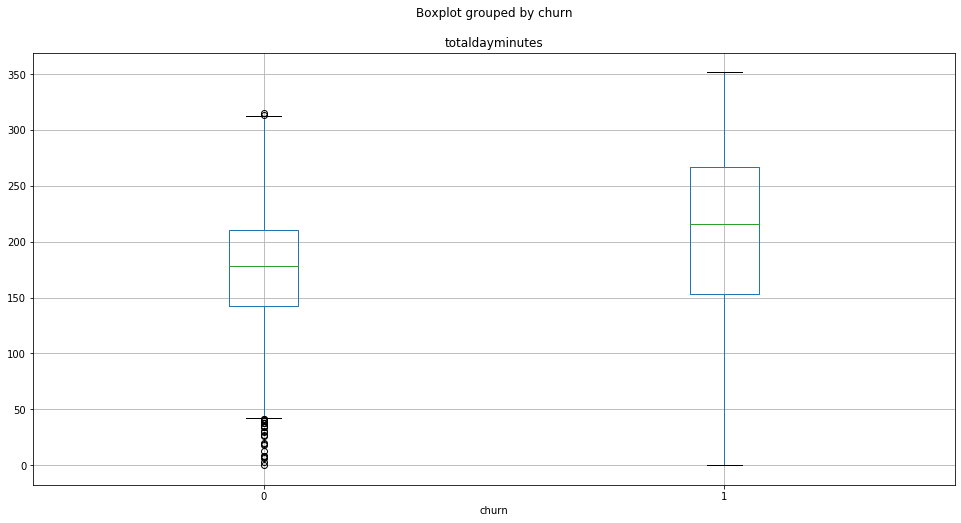

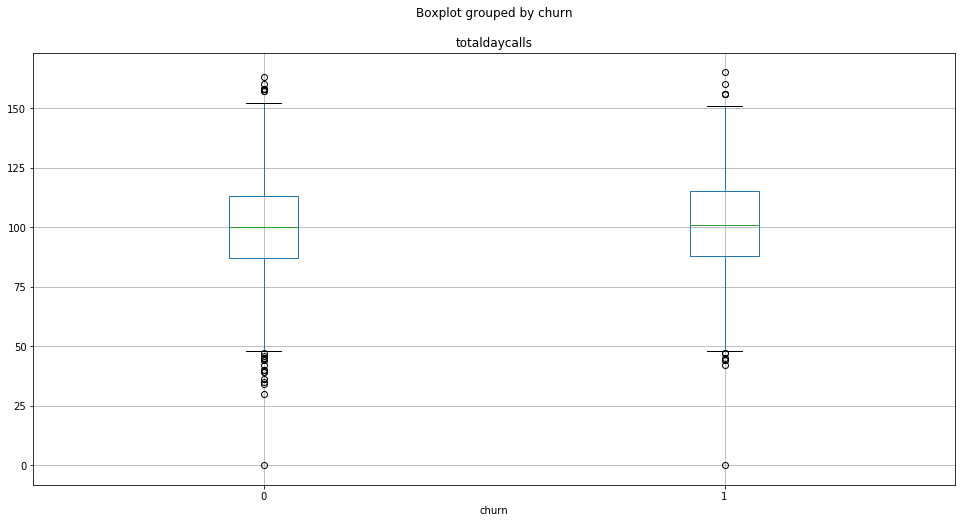

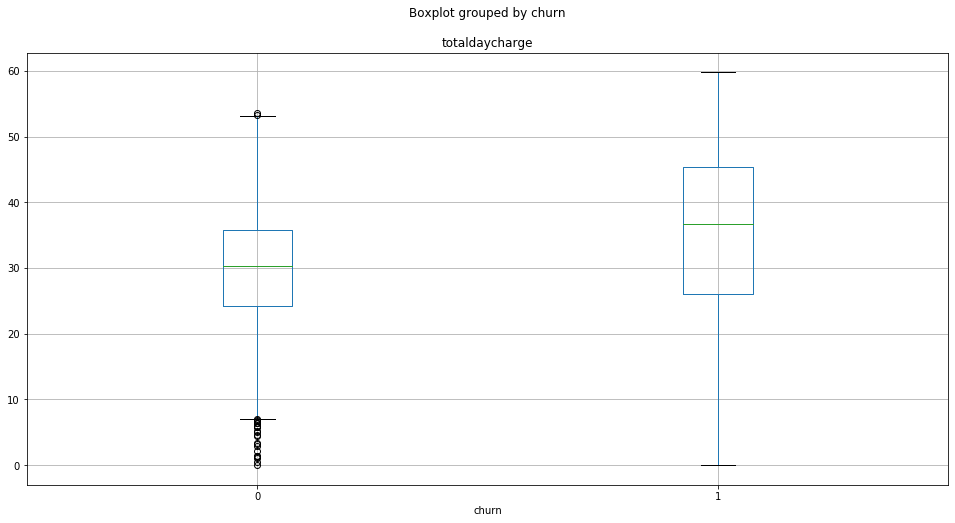

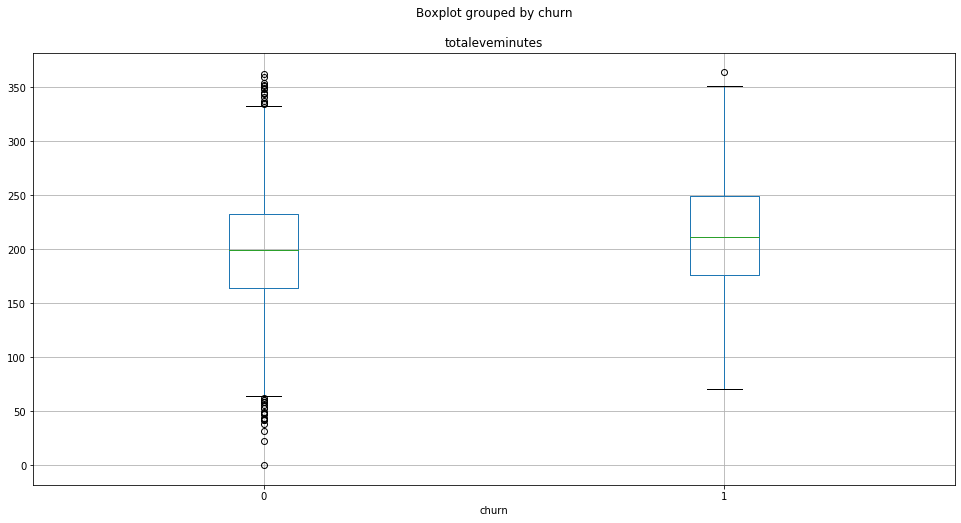

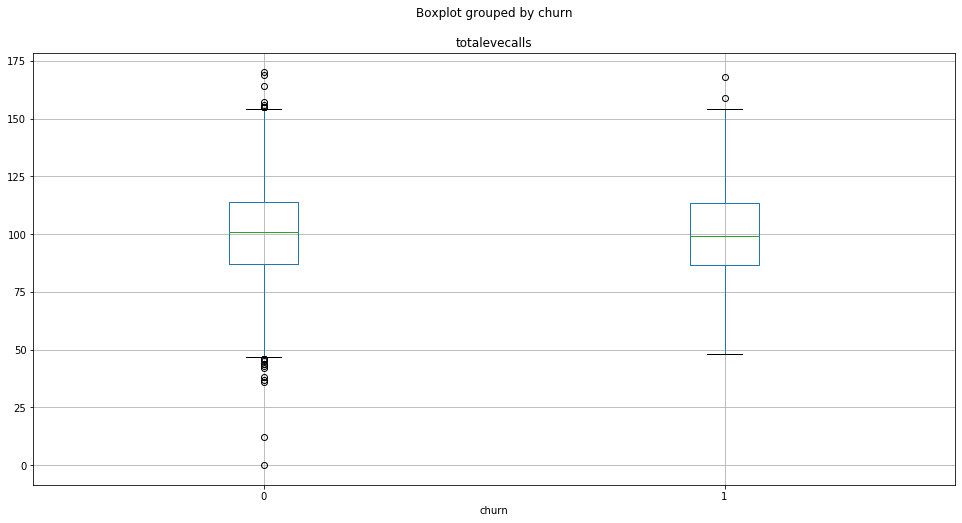

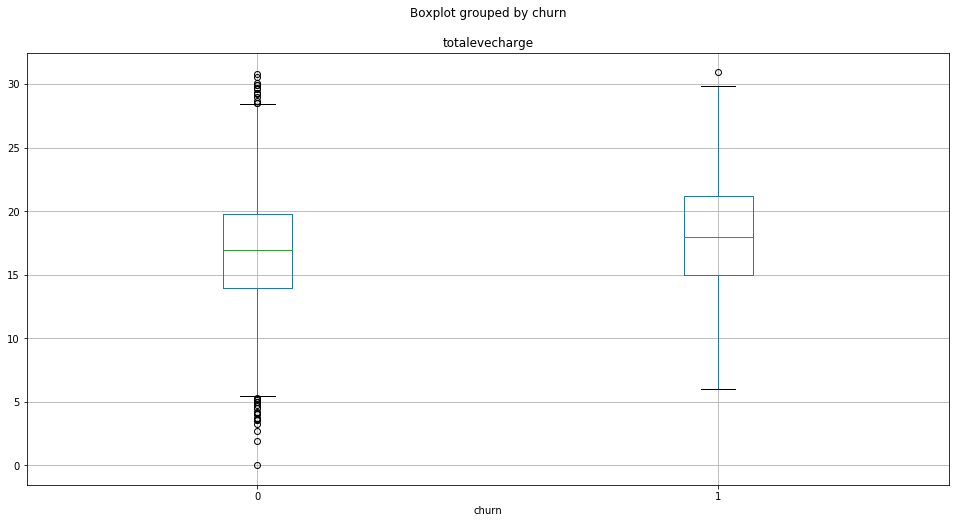

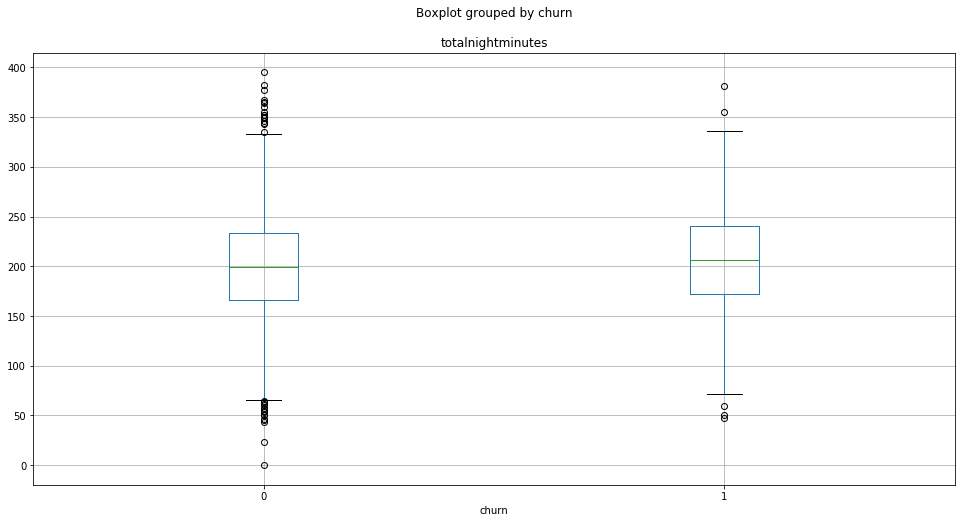

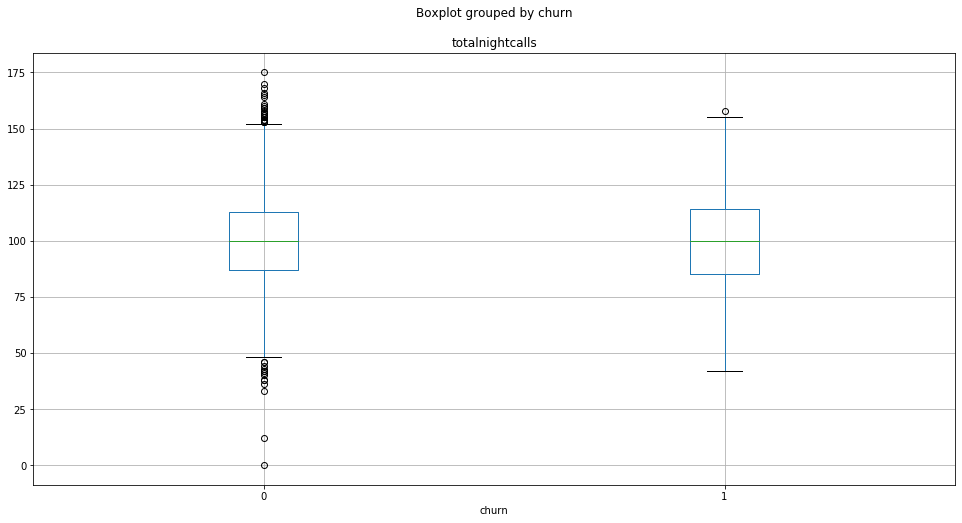

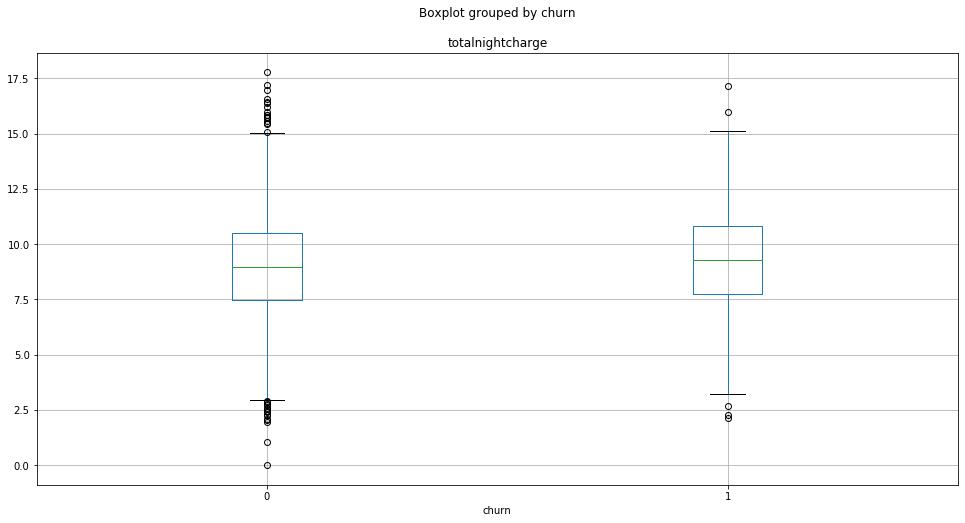

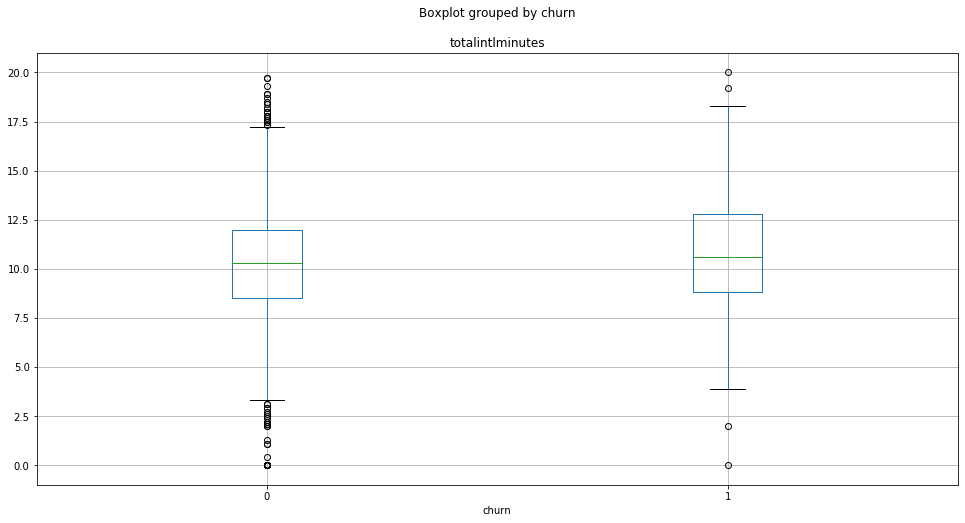

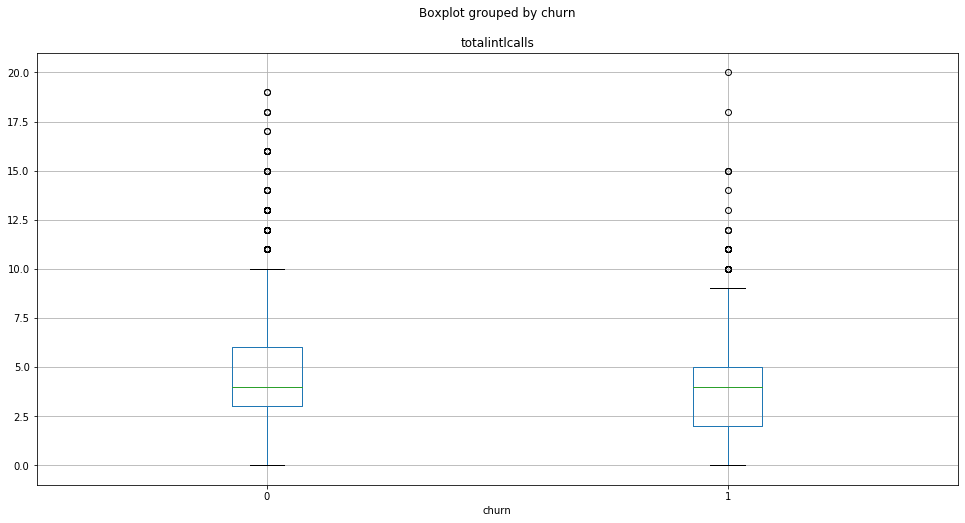

In [55]:
for selected_column in df.columns[0:-2]:
    #print(desalination_dataframe[[selected_column]].describe())
    df.boxplot(column=[selected_column], by='churn')
#dataframe_1.describe()
#dataframe_1.boxplot(by='PUMP FAILURE (1 or 0)')
plt.rcParams['figure.figsize'] = (15,7)

In [56]:
#View mean of all variables for churners versus non churners
churn_mean = churn.mean()
nonchurn_mean = nonchurn.mean()

nonchurn_mean

churn                           0.000000
accountlength                  99.917074
internationalplan               0.063825
voicemailplan                   0.284416
numbervmailmessages             8.291870
totaldayminutes               175.746564
totaldaycalls                  99.899604
totaldaycharge                 29.877494
totaleveminutes               198.805031
totalevecalls                 100.241556
totalevecharge                 16.898654
totalnightminutes             199.455113
totalnightcalls                99.975775
totalnightcharge                8.975593
totalintlminutes               10.190869
totalintlcalls                  4.481947
totalintlcharge                 2.752055
numbercustomerservicecalls      1.457722
dtype: float64

In [57]:
churn_mean

churn                           1.000000
accountlength                 102.332390
internationalplan               0.281471
voicemailplan                   0.144272
numbervmailmessages             4.496464
totaldayminutes               207.870580
totaldaycalls                 100.817539
totaldaycharge                 35.338416
totaleveminutes               211.757850
totalevecalls                  99.884017
totalevecharge                 17.999562
totalnightminutes             206.078218
totalnightcalls                99.575672
totalnightcharge                9.273607
totalintlminutes               10.692362
totalintlcalls                  4.151344
totalintlcharge                 2.887426
numbercustomerservicecalls      2.254597
dtype: float64